In [1]:
from ema_workbench import (MultiprocessingEvaluator,SequentialEvaluator, ema_logging, save_results, load_results)
from SALib.analyze import sobol
from ema_workbench.em_framework.evaluators import SOBOL
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_problem_definitions import ema_problem

In [2]:
# import problem definition
model = ema_problem(2)

In [3]:
experiment_SOBOL, outcomes_SOBOL = load_results('../data/ema/sobol_results.tar.gz')

In [26]:
# prepare SOBOL from results
def get_sobol_results(variable):
    problem = get_SALib_problem(model.uncertainties)
    Si = sobol.analyze(problem, outcomes_SOBOL[variable],
                    calc_second_order=True, print_to_console=False)
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]
    ax.set_title(variable)
    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,6)
    fig.subplots_adjust(bottom=0.3), 25
    plt.show()
    return fig

In [16]:
out = ['min_average_battery_percentage',
        'mean_average_battery_percentage',
        'min_power_demand',
        'mean_power_demand',
        'max_power_demand',
        'min_VTG_capacity',
        'mean_VTG_capacity',
        'max_VTG_capacity',
        'min_mean_charging',
        'mean_mean_charging',
        'max_mean_charging']

In [24]:
pd.DataFrame(outcomes_SOBOL)['min_power_demand'].describe()

count    5200.000000
mean        5.419980
std         0.479112
min         5.000037
25%         5.112135
50%         5.267939
75%         5.547237
max        11.575757
Name: min_power_demand, dtype: float64

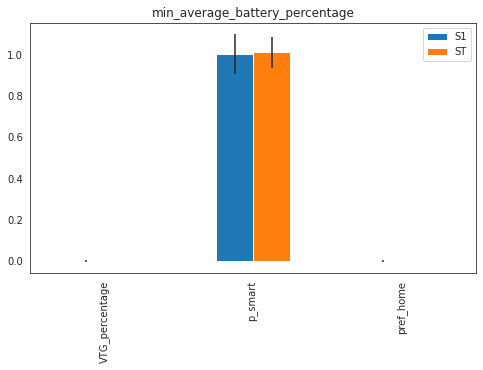

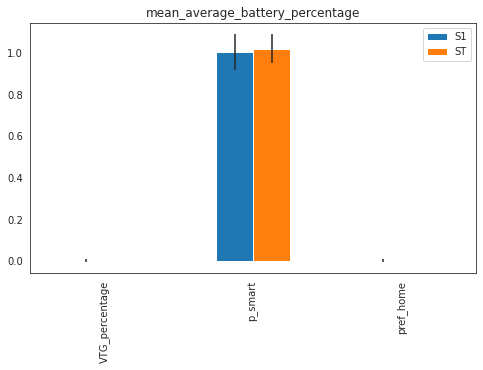

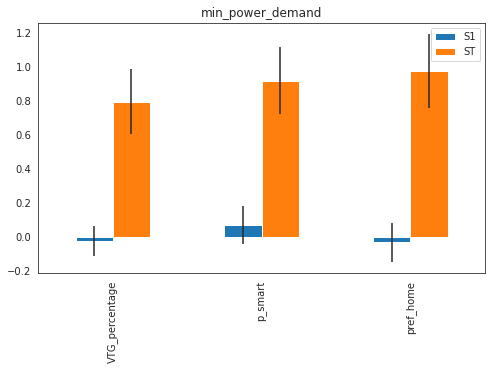

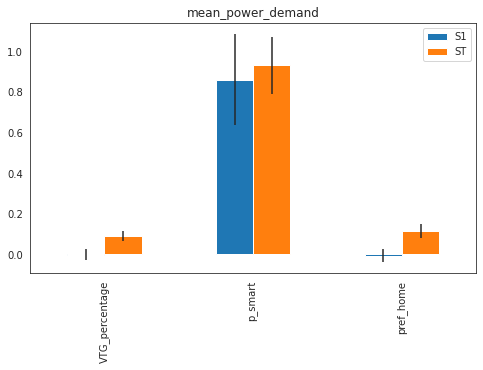

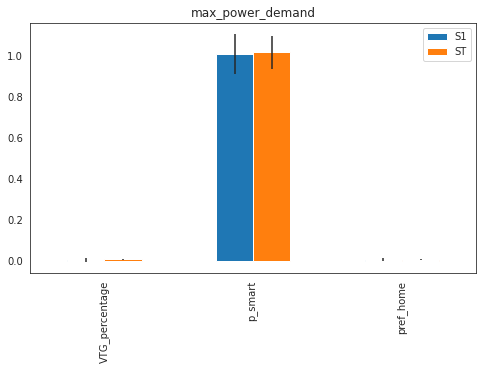

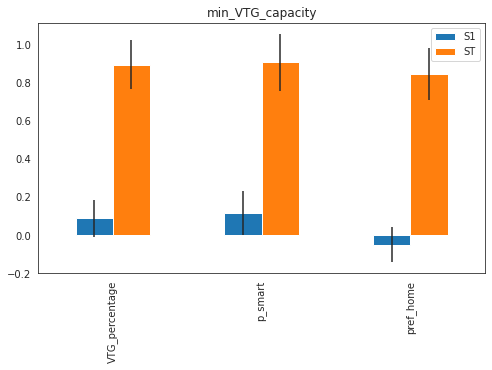

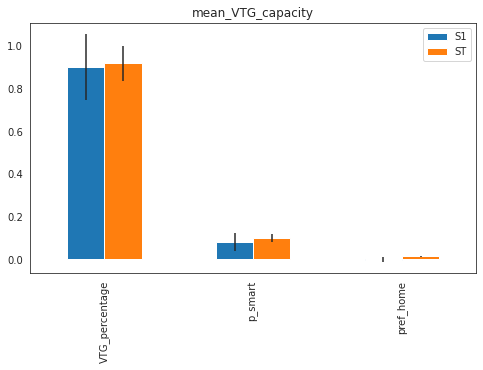

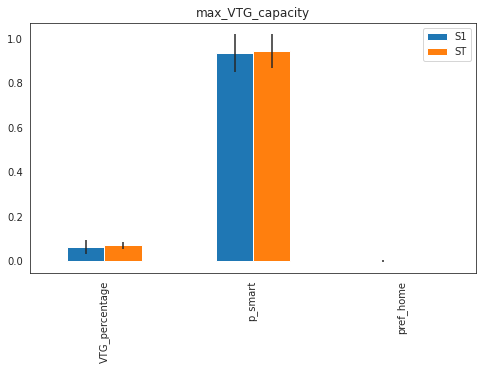

/home/tevito/anaconda3/envs/aabm/lib/python3.9/site-packages/SALib/analyze/sobol.py:96: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()
/home/tevito/anaconda3/envs/aabm/lib/python3.9/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


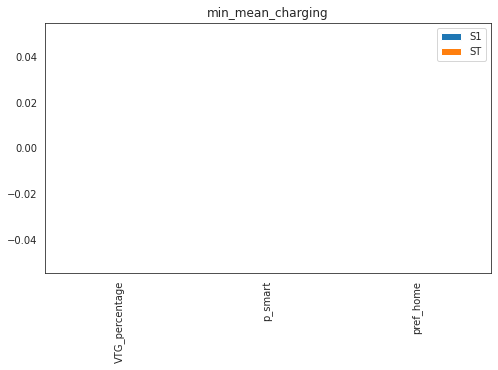

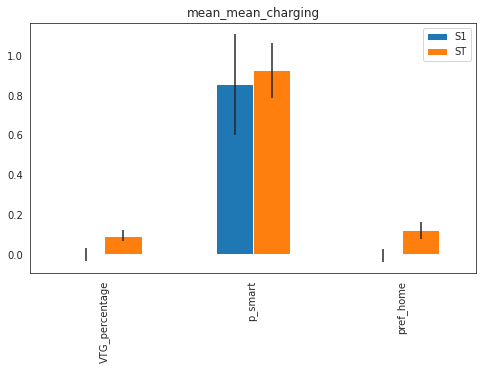

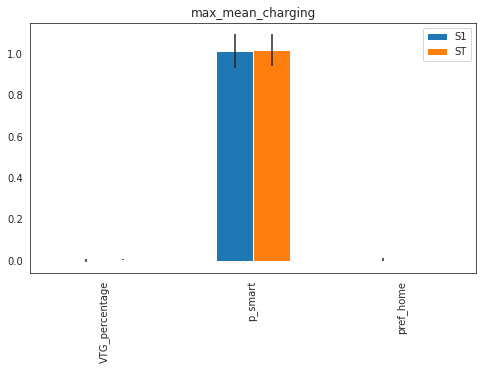

In [30]:
for outcome in out:
    get_sobol_results(outcome).savefig('../figures/sobol/{}.png'.format(outcome))
    

In [6]:
experiment_SOBOL

,VTG_percentage,p_smart,pref_home,scenario,policy,model
0,0.001465,0.376465,0.447754,0,None,EtmEVsModel
1,0.486816,0.376465,0.447754,1,None,EtmEVsModel
2,0.001465,0.557129,0.447754,2,None,EtmEVsModel
3,0.001465,0.376465,0.844238,3,None,EtmEVsModel
4,0.001465,0.557129,0.844238,4,None,EtmEVsModel
...,...,...,...,...,...,...
5195,0.701660,0.645020,0.210449,5195,None,EtmEVsModel
5196,0.701660,0.050293,0.210449,5196,None,EtmEVsModel
5197,0.251465,0.645020,0.210449,5197,None,EtmEVsModel
5198,0.251465,0.050293,0.741699,5198,None,EtmEVsModel
